# 15. This problem involves the Boston data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

## (a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.
## (b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?
## (c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

______________________________________________________________________

# Let's analyze our data and understand all the features of our data.

__________________________

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Loading the Dataset


In [2]:
boston_data = pd.read_csv('Boston.csv')

# First 5 values in the Dataset

In [3]:
boston_data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


# Renaming Unnamed :0 column as id

In [4]:
boston_data.rename( columns={'Unnamed: 0':'id'}, inplace=True)

In [5]:
boston_data.head()

,id,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


### Let's Understand our Features 

`id` - Number assigned to every entry.

`CRIM` - per capita crime rate by town.

`ZN` - proportion of residential land zoned for lots over 25,000 sq.ft.

`INDUS` - proportion of non-retail business acres per town.

`CHAS` - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

`NOX` - nitric oxides concentration (parts per 10 million)

`RM` - average number of rooms per dwelling.

`AGE` - proportion of owner-occupied units built prior to 1940.

`DIS` - weighted distances to five Boston employment centres.

`RAD` - index of accessibility to radial highways.

`TAX` - full-value property-tax rate per $10,000.

PTRATIO - pupil-teacher ratio by town.

`LSTAT` - percent lower status of the population.

`MEDV` - Median value of owner-occupied homes in $1000's


# Shape of the Data : (Number of rows,Number of columns)

In [6]:
boston_data.shape

(506, 14)

# Qualitative and Quantitative Features

In [7]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       506 non-null    int64  
 1   crim     506 non-null    float64
 2   zn       506 non-null    float64
 3   indus    506 non-null    float64
 4   chas     506 non-null    int64  
 5   nox      506 non-null    float64
 6   rm       506 non-null    float64
 7   age      506 non-null    float64
 8   dis      506 non-null    float64
 9   rad      506 non-null    int64  
 10  tax      506 non-null    int64  
 11  ptratio  506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


# Checking for Missing Values

In [8]:
boston_data.isnull().sum()

id         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

# Correlation Between Variables

In [9]:
boston_data.corr()

,id,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
id,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,0.258465,-0.226604
crim,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
zn,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
indus,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
chas,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
nox,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
rm,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
age,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
dis,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
rad,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626


# 15. (a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

## As we know, `CRIM`(per capita crime rate) is our response variable and all the other variables are predictors.

# y = `CRIM`  ; X = `ZN`

In [10]:
X = boston_data[['zn']]
X = sm.add_constant(X)
y = boston_data[['crim']]
model = sm.OLS(y,X).fit()
print("Model Paramters are: \n",model.params)
print("Model Summary : \n",model.summary())

Model Paramters are: 
 const    4.453694
zn      -0.073935
dtype: float64
Model Summary : 
                             OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           5.51e-06
Time:                        11:28:58   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

__The R-squared value for above model is 0.040 which means we can only predict 4% of Crime variance based on the ZN (proportion of residential land zoned for lots over 25000 sq. ft.) and p-value is close to 0 but the model doesn't look significant.__

In [11]:
y_pred = model.predict(X)

In [12]:
y_pred = pd.DataFrame({'crim' : y_pred})

In [13]:
y_residual = y.subtract(y_pred)

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


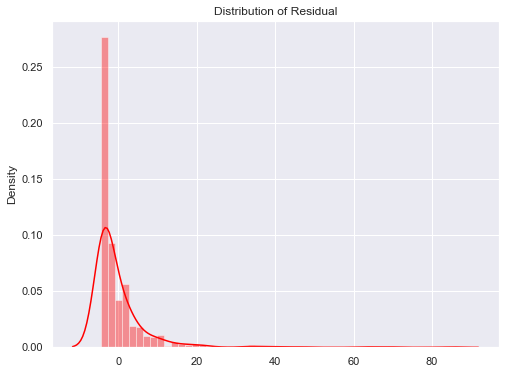

In [14]:
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(y_residual, color='red', bins = 50)
plt.title("Distribution of Residual")
plt.show();

__We can also observe from Distribution of Residuals that this model is less significant as residuals do not even follow path of Normal Distribution.__

_______________________________________________

# y = `CRIM`  ; X = `INDUS`

In [15]:
X = boston_data[['indus']]
X = sm.add_constant(X)
y = boston_data[['crim']]
model = sm.OLS(y,X).fit()
print("Model Paramters are: \n",model.params)
print("Model Summary : \n",model.summary())

Model Paramters are: 
 const   -2.063743
indus    0.509776
dtype: float64
Model Summary : 
                             OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     99.82
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           1.45e-21
Time:                        11:28:58   Log-Likelihood:                -1760.6
No. Observations:                 506   AIC:                             3525.
Df Residuals:                     504   BIC:                             3534.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

__The R-squared value for the above model is 0.165 which means we can only predict 16.5% of Crime variance based on the `INDUS` and the p-value is close to 0 but the model doesn't look significant.__

In [16]:
y_pred = model.predict(X)

y_pred = pd.DataFrame({'crim' : y_pred})

y_residual = y.subtract(y_pred)

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


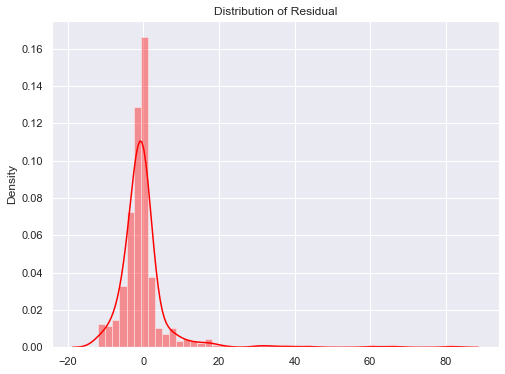

In [17]:
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(y_residual, color='red', bins = 50)
plt.title("Distribution of Residual")
plt.show();

# y = `CRIM`  ; X = `CHAS`

In [18]:
X = boston_data[['chas']]
X = sm.add_constant(X)
y = boston_data[['crim']]
model = sm.OLS(y,X).fit()
print("Model Paramters are: \n",model.params)
print("Model Summary : \n",model.summary())

Model Paramters are: 
 const    3.744447
chas    -1.892777
dtype: float64
Model Summary : 
                             OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.579
Date:                Sat, 01 Oct 2022   Prob (F-statistic):              0.209
Time:                        11:28:58   Log-Likelihood:                -1805.6
No. Observations:                 506   AIC:                             3615.
Df Residuals:                     504   BIC:                             3624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

__The R-squared value for the above model is 0.003 which means we can only predict 0.3 % of Crime variance based on the `CHAS` and the p-value is close to 0 for the model but for individual variable p-value is more than 0.05 which make this variable insignificant.__

In [19]:
y_pred = model.predict(X)

y_pred = pd.DataFrame({'crim' : y_pred})

y_residual = y.subtract(y_pred)

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


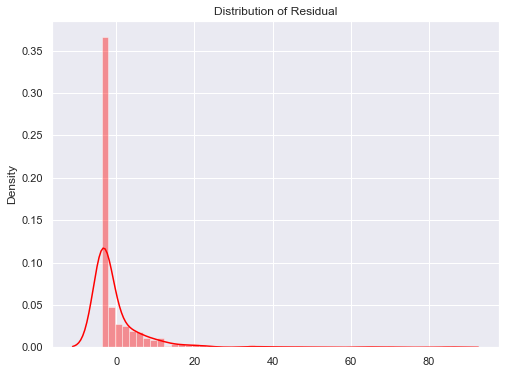

In [20]:
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(y_residual, color='red', bins = 50)
plt.title("Distribution of Residual")
plt.show();

__The distribution of residuals also look right skewed and clearly distribution of residuals do not follow a path of Normal Distribution.__

# y = `CRIM`  ; X = `NOX`

In [21]:
X = boston_data[['nox']]
X = sm.add_constant(X)
y = boston_data[['crim']]
model = sm.OLS(y,X).fit()
print("Model Paramters are: \n",model.params)
print("Model Summary : \n",model.summary())

Model Paramters are: 
 const   -13.719882
nox      31.248531
dtype: float64
Model Summary : 
                             OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     108.6
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           3.75e-23
Time:                        11:28:59   Log-Likelihood:                -1757.0
No. Observations:                 506   AIC:                             3518.
Df Residuals:                     504   BIC:                             3526.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

__The R-squared value for the above model is 0.177 which means we can only predict 17.7% of Crime variance based on the `NOX` and the p-value is close to 0 but the model doesn't look significant.__


In [22]:
y_pred = model.predict(X)

y_pred = pd.DataFrame({'crim' : y_pred})

y_residual = y.subtract(y_pred)

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


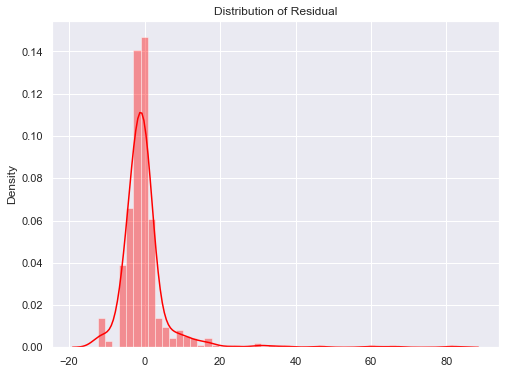

In [23]:
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(y_residual, color='red', bins = 50)
plt.title("Distribution of Residual")
plt.show();

__The distribution of residuals also look right skewed and clearly distribution of residuals do not follow a path of Normal Distribution.__

# y = CRIM ; X = RM

In [24]:
X = boston_data[['rm']]
X = sm.add_constant(X)
y = boston_data[['crim']]
model = sm.OLS(y,X).fit()
print("Model Paramters are: \n",model.params)
print("Model Summary : \n",model.summary())

Model Paramters are: 
 const    20.481804
rm       -2.684051
dtype: float64
Model Summary : 
                             OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     25.45
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           6.35e-07
Time:                        11:28:59   Log-Likelihood:                -1793.9
No. Observations:                 506   AIC:                             3592.
Df Residuals:                     504   BIC:                             3600.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

__The R-squared value for the above model is 0.048 which means we can only predict 4.8 % of Crime variance based on the `RM` and the p-value is close to 0 but the model doesn't look significant.__

In [25]:
y_pred = model.predict(X)

y_pred = pd.DataFrame({'crim' : y_pred})

y_residual = y.subtract(y_pred)

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


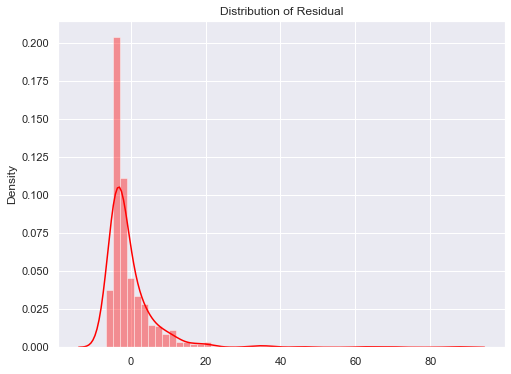

In [26]:
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(y_residual, color='red', bins = 50)
plt.title("Distribution of Residual")
plt.show();

__The distribution of residuals also look right skewed and clearly distribution of residuals do not follow a path of Normal Distribution.__

# y = CRIM ; X = AGE

In [27]:
X = boston_data[['age']]
X = sm.add_constant(X)
y = boston_data[['crim']]
model = sm.OLS(y,X).fit()
print("Model Paramters are: \n",model.params)
print("Model Summary : \n",model.summary())

Model Paramters are: 
 const   -3.777906
age      0.107786
dtype: float64
Model Summary : 
                             OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     71.62
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           2.85e-16
Time:                        11:28:59   Log-Likelihood:                -1772.7
No. Observations:                 506   AIC:                             3549.
Df Residuals:                     504   BIC:                             3558.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

__The R-squared value for the above model is 0.124 which means we can only predict 12.4% of Crime variance based on the `AGE` and the p-value is close to 0 but the model doesn't look significant.__

In [28]:
y_pred = model.predict(X)

y_pred = pd.DataFrame({'crim' : y_pred})

y_residual = y.subtract(y_pred)

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


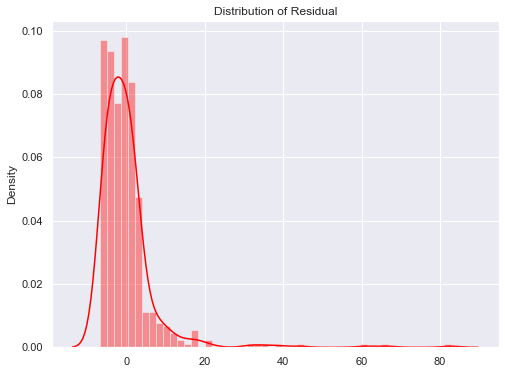

In [29]:
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(y_residual, color='red', bins = 50)
plt.title("Distribution of Residual")
plt.show();

__The distribution of residuals also look right skewed and clearly distribution of residuals do not follow a path of Normal Distribution.__

# y = CRIM ; X = DIS

In [30]:
X = boston_data[['dis']]
X = sm.add_constant(X)
y = boston_data[['crim']]
model = sm.OLS(y,X).fit()
print("Model Paramters are: \n",model.params)
print("Model Summary : \n",model.summary())

Model Paramters are: 
 const    9.499262
dis     -1.550902
dtype: float64
Model Summary : 
                             OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     84.89
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           8.52e-19
Time:                        11:28:59   Log-Likelihood:                -1767.0
No. Observations:                 506   AIC:                             3538.
Df Residuals:                     504   BIC:                             3546.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

__The R-squared value for the above model is 0.144 which means we can only predict 14.4% of Crime variance based on the `DIS` and the p-value is close to 0 but the model doesn't look significant.__

In [31]:
y_pred = model.predict(X)

y_pred = pd.DataFrame({'crim' : y_pred})

y_residual = y.subtract(y_pred)

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


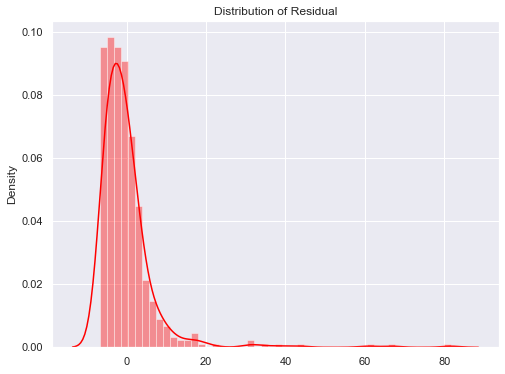

In [32]:
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(y_residual, color='red', bins = 50)
plt.title("Distribution of Residual")
plt.show();

__The distribution of residuals also look right skewed and clearly distribution of residuals do not follow a path of Normal Distribution.__

# y = CRIM ; X = RAD

In [33]:
X = boston_data[['rad']]
X = sm.add_constant(X)
y = boston_data[['crim']]
model = sm.OLS(y,X).fit()
print("Model Paramters are: \n",model.params)
print("Model Summary : \n",model.summary())

Model Paramters are: 
 const   -2.287159
rad      0.617911
dtype: float64
Model Summary : 
                             OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     323.9
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           2.69e-56
Time:                        11:28:59   Log-Likelihood:                -1680.8
No. Observations:                 506   AIC:                             3366.
Df Residuals:                     504   BIC:                             3374.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

__The R-squared value for the above model is 0.391 which means we can only predict 39.1% of Crime variance based on the `RAD` (index of accessibility to radial highways) which is way more than what we have seen in the previous variables and the p-value is close to 0.__

In [34]:
y_pred = model.predict(X)

y_pred = pd.DataFrame({'crim' : y_pred})

y_residual = y.subtract(y_pred)

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


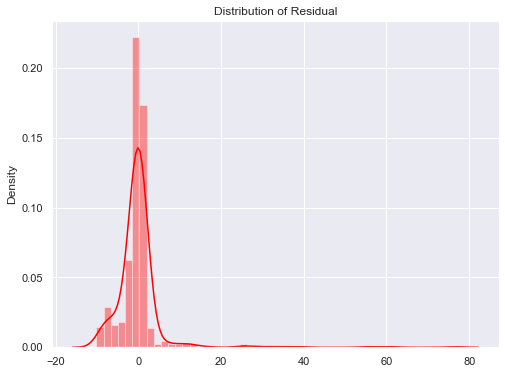

In [35]:
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(y_residual, color='red', bins = 50)
plt.title("Distribution of Residual")
plt.show();

__The distribution of residuals also look right skewed and clearly distribution of residuals do not follow a path of Normal Distribution.__

# y = CRIM ; X = TAX

In [36]:
X = boston_data[['tax']]
X = sm.add_constant(X)
y = boston_data[['crim']]
model = sm.OLS(y,X).fit()
print("Model Paramters are: \n",model.params)
print("Model Summary : \n",model.summary())

Model Paramters are: 
 const   -8.528369
tax      0.029742
dtype: float64
Model Summary : 
                             OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     259.2
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           2.36e-47
Time:                        11:29:00   Log-Likelihood:                -1701.4
No. Observations:                 506   AIC:                             3407.
Df Residuals:                     504   BIC:                             3415.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

__The R-squared value for the above model is 0.340 which means we can only predict 34% of Crime variance based on the `TAX` and the p-value is close to 
0.__

In [37]:
y_pred = model.predict(X)

y_pred = pd.DataFrame({'crim' : y_pred})

y_residual = y.subtract(y_pred)

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


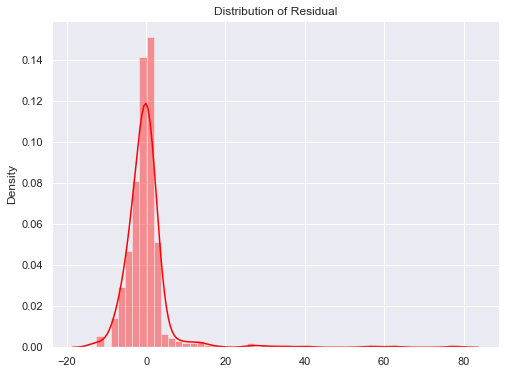

In [38]:
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(y_residual, color='red', bins = 50)
plt.title("Distribution of Residual")
plt.show();

__The distribution of residuals also look right skewed and clearly distribution of residuals do not follow a path of Normal Distribution.__

# y = CRIM ; X = PTRATIO

In [39]:
X = boston_data[['ptratio']]
X = sm.add_constant(X)
y = boston_data[['crim']]
model = sm.OLS(y,X).fit()
print("Model Paramters are: \n",model.params)
print("Model Summary : \n",model.summary())

Model Paramters are: 
 const     -17.646933
ptratio     1.151983
dtype: float64
Model Summary : 
                             OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     46.26
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           2.94e-11
Time:                        11:29:00   Log-Likelihood:                -1784.1
No. Observations:                 506   AIC:                             3572.
Df Residuals:                     504   BIC:                             3581.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

__The R-squared value for the above model is 0.084 which means we can only predict 8.4 % of Crime variance based on the `PTRATIO` and the p-value is close to 0.__

In [40]:
y_pred = model.predict(X)

y_pred = pd.DataFrame({'crim' : y_pred})

y_residual = y.subtract(y_pred)

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


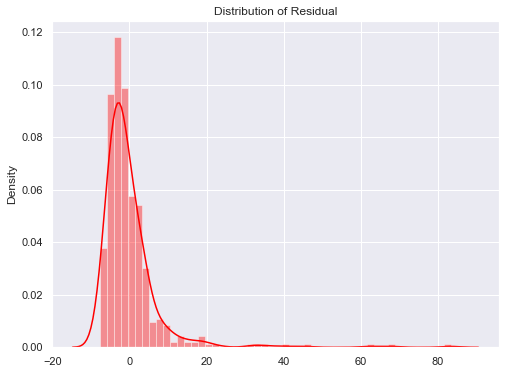

In [41]:
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(y_residual, color='red', bins = 50)
plt.title("Distribution of Residual")
plt.show();

__The distribution of residuals also look right skewed and clearly distribution of residuals do not follow a path of Normal Distribution.__

# y = CRIM ; X = LSTAT

In [42]:
X = boston_data[['lstat']]
X = sm.add_constant(X)
y = boston_data[['crim']]
model = sm.OLS(y,X).fit()
print("Model Paramters are: \n",model.params)
print("Model Summary : \n",model.summary())

Model Paramters are: 
 const   -3.330538
lstat    0.548805
dtype: float64
Model Summary : 
                             OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     132.0
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           2.65e-27
Time:                        11:29:00   Log-Likelihood:                -1747.5
No. Observations:                 506   AIC:                             3499.
Df Residuals:                     504   BIC:                             3507.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

__The R-squared value for the above model is 0.208 which means we can only predict 20.8 % of Crime variance based on the `LSTAT` and the p-value is close to 0.__

In [43]:
y_pred = model.predict(X)

y_pred = pd.DataFrame({'crim' : y_pred})

y_residual = y.subtract(y_pred)

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


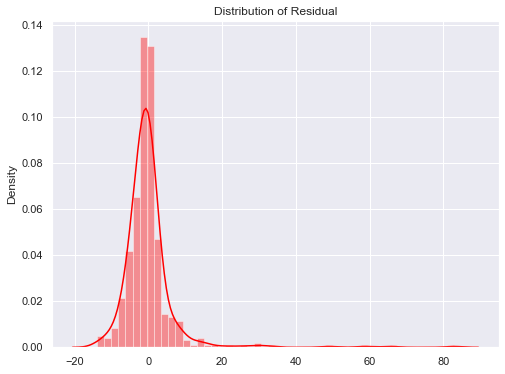

In [44]:
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(y_residual, color='red', bins = 50)
plt.title("Distribution of Residual")
plt.show();

__The distribution of residuals also look right skewed and clearly distribution of residuals do not follow a path of Normal Distribution.__

# y = CRIM ; X = MEDV

In [45]:
X = boston_data[['medv']]
X = sm.add_constant(X)
y = boston_data[['crim']]
model = sm.OLS(y,X).fit()
print("Model Paramters are: \n",model.params)
print("Model Summary : \n",model.summary())

Model Paramters are: 
 const    11.796536
medv     -0.363160
dtype: float64
Model Summary : 
                             OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           1.17e-19
Time:                        11:29:00   Log-Likelihood:                -1765.0
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

__The R-squared value for the above model is 0.151 which means we can only predict 15.1 % of Crime variance based on the `MEDV` and the p-value is close to 0.__

In [46]:
y_pred = model.predict(X)

y_pred = pd.DataFrame({'crim' : y_pred})

y_residual = y.subtract(y_pred)

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


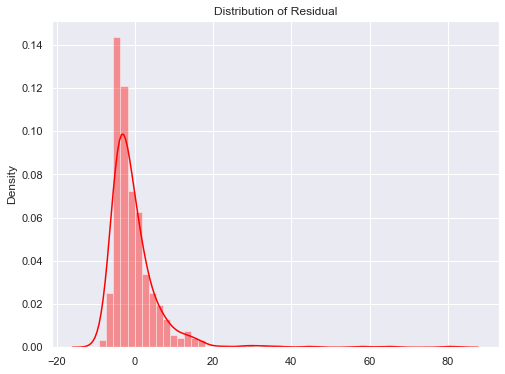

In [47]:
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(y_residual, color='red', bins = 50)
plt.title("Distribution of Residual")
plt.show();

__The distribution of residuals also look right skewed and clearly distribution of residuals do not follow a path of Normal Distribution.__

# Pairplot of `CRIME` vs other variables `ZN`, `INDUS`, `CHAS`, `NOX`, `RM`, `AGE`, `DIS`, `RAD`, `TAX`, `PTRATIO`, `LSTAT`, `MEDV`

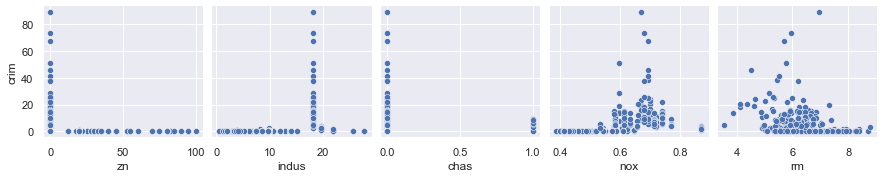

In [48]:
sns.pairplot(boston_data,y_vars='crim',x_vars=['zn', 'indus', 'chas', 'nox', 'rm'])  #'lstat', 'medv']);

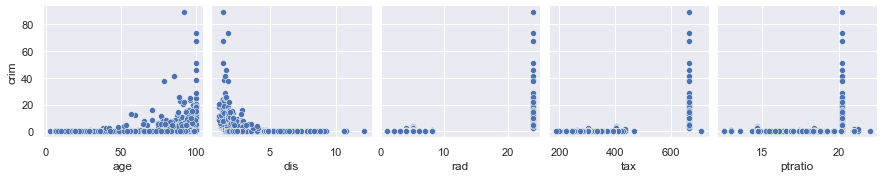

In [49]:
sns.pairplot(boston_data,y_vars='crim',x_vars=['age','dis', 'rad', 'tax', 'ptratio']);

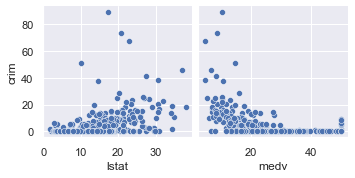

In [50]:
sns.pairplot(boston_data,y_vars='crim',x_vars=['lstat', 'medv']);

__1. If we consider p-Value of individual variable then all the variables are significant except CHAS (Charles River dummy variable (1 if tract bounds river; 0 otherwise).__

__2. Although, when we look at R-squared value none of the variables were able to predict y more than 40%. RAD has a R-squared value of 39.1%, TAX has a R-squared value of 34.1 %, LSTAT has a R-squared value of 20.8%, NOX has a R-squared value of 17.7 %, INDUS has a R-squared value of 16.5 %, MEDV has a R-squared value of 15.1% and AGE has a R-squared value of 12.4 % except these variables all other variables have R-squared value below 10%.__ 


___________________________________________________________________________________________________________________________

# Question 15. (b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

In [52]:
import statsmodels.api as sm

In [54]:
X = boston_data[['zn', 'indus', 'chas', 'nox', 'rm', 'age','dis', 'rad', 'tax', 'ptratio','lstat', 'medv']]
y = boston_data['crim']

In [55]:
X.head()

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [56]:
y.head()

0    0.00632
1    0.02731
2    0.02729
3    0.03237
4    0.06905
Name: crim, dtype: float64

## adding a constant to X

In [57]:
X = sm.add_constant(X)

## Fitting the Model using OLS(Ordinary Least Square) method present in the statsmodels.api

In [58]:
model = sm.OLS(y,X).fit()

## Model Parameters to get the value of Intercept and Slope

In [59]:
model.params

const      13.778394
zn          0.045710
indus      -0.058350
chas       -0.825378
nox        -9.957587
rm          0.628911
age        -0.000848
dis        -1.012247
rad         0.612465
tax        -0.003776
ptratio    -0.304073
lstat       0.138801
medv       -0.220056
dtype: float64

In [60]:
round(model.params,4)

const      13.7784
zn          0.0457
indus      -0.0584
chas       -0.8254
nox        -9.9576
rm          0.6289
age        -0.0008
dis        -1.0122
rad         0.6125
tax        -0.0038
ptratio    -0.3041
lstat       0.1388
medv       -0.2201
dtype: float64

## The y-intercept value is 13.7784
## Here Equation of Multiple Linear Regression model becomes:
__y = 13.7784 + (0.0457 * ZN) + (-0.0584 * INDUS) + (-0.8254 * CHAS) + (-9.9576 * NOX) + (0.6289 * RM) + (-0.0008 * age) + (-1.0122 * DIS) + (0.6125 * RAD) + (-0.0038 * TAX) + (-0.3041 * PTRATIO) + (0.1388 * LSTAT) + (-0.2201 * MEDV)__


# Model Summary

In [62]:
print("Model Summary: ",model.summary())

Model Summary:                              OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           2.03e-56
Time:                        11:43:35   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7784      7.082    

## The R-squared Value of the model is 0.449 which means that this model is capable of predicting 44.9% variance of CRIME based on the other variables available.

## The p-Value of a model is 0.052 which is borderline value to satisfy the condition p-value < |0.05|.

## Based on p-Value of all the variables, We can reject the NULL HYPOTHESIS of ZN, DIS, RAD and MEDV.

# Question 15. (c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

# Answers

# The result of individual variable as Simple Linear Regression and Result of Multiple Linear Regression have not been impressive as a whole but to compare I would definite go with Multiple Linear regression as it gives a R-squared value of 0.449 which means we can predict 44.9 % CRIME variance based on other variables, and also the R-squared value of Individual variable has been really low. We can also improve the accuracy of our Model in Multiple Linear Regression.

In [91]:
multiple_data = {'Name' : ['zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','lstat','medv'],
       'Values' : [0.0457,-0.0584,-0.8254,-9.9576,0.6289,0.0008,-1.0122,0.6125,-0.0038,-0.3041,0.1388,-0.2201]}

In [71]:
individual_data = {'Name' : ['zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','lstat','medv'],
       'Values' : [-0.073935,0.509776,-1.892777,31.248531,-2.684051,0.107786,-1.550902,0.617911,0.029742,1.151983,0.548805,-0.363160]}

In [101]:
m_result = pd.DataFrame(multiple_data)

In [103]:
i_result = pd.DataFrame(individual_data)

In [106]:
m_result.head()

,Name,Values
0,zn,0.0457
1,indus,-0.0584
2,chas,-0.8254
3,nox,-9.9576
4,rm,0.6289


In [107]:
i_result.head()

,Name,Values
0,zn,-0.073935
1,indus,0.509776
2,chas,-1.892777
3,nox,31.248531
4,rm,-2.684051


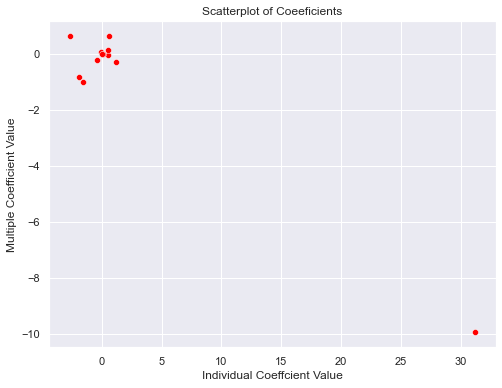

In [112]:
sns.scatterplot(x=i_result['Values'], y = m_result['Values'],color='red')
plt.xlabel("Individual Coeffcient Value")
plt.ylabel("Multiple Coefficient Value")
plt.title("Scatterplot of Coeeficients")
plt.show();